In [1]:
# Dependencies and Setup
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
#ALL the info needed to run these figures (explainations can be found on final sheet)
heart_data = pd.read_csv("./heart.csv")
heart_predict = pd.read_csv("./Heart_Disease_Prediction.csv")

heart_data_df = pd.DataFrame(heart_data)

heart_predict_df = pd.DataFrame(heart_predict)

test = heart_predict_df

test = test.replace({'Heart Disease': 'Presence'},1)
test = test.replace({'Heart Disease': 'Absence'},0)

heart_data_df_cc = heart_data_df.rename(columns={"age": "Age",
                                              "sex": "Sex",                                               
                                              "cp": "Chest pain type",
                                              "trestbps": "BP",   
                                              "chol": "Cholesterol",
                                              "fbs": "FBS over 120",
                                             "exang": "Exercise angina",
                                                "ca": "Number of vessels fluro",
                                                "target": "Heart Disease"})

heart_data_merge = pd.merge(test, heart_data_df_cc, how="outer", on=['Age', 
                                                                                 "Sex",
                                                                                 "Chest pain type",
                                                                                 "BP",
                                                                                 "Cholesterol",
                                                                                 "FBS over 120",
                                                                                 "Exercise angina",
                                                                                "Number of vessels fluro",
                                                                                 "Heart Disease"
                                                                                ])

heart_data_dn = heart_data_merge.dropna(axis=1)

heart_data_clean = heart_data_dn.drop_duplicates()

Focal_group = heart_data_clean.loc[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]

duplicate_rows = heart_data_dn.duplicated()

num_duplicates = duplicate_rows.sum()

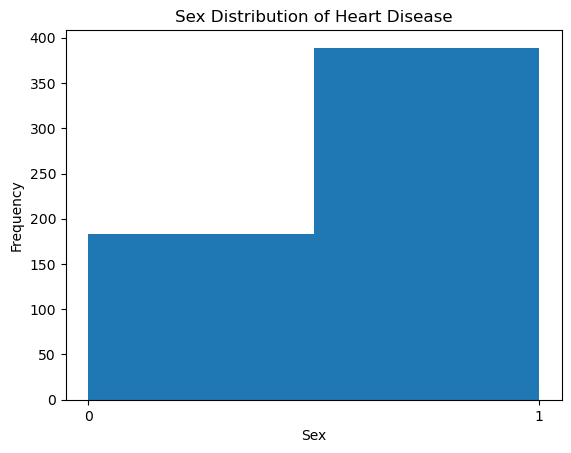

In [3]:
#Sex Histogram
plt.hist(heart_data_clean['Sex'], bins=2)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.title('Sex Distribution of Heart Disease')
plt.savefig("./ExtraFig1.png")
plt.show()

#Sex Histogram 45-65

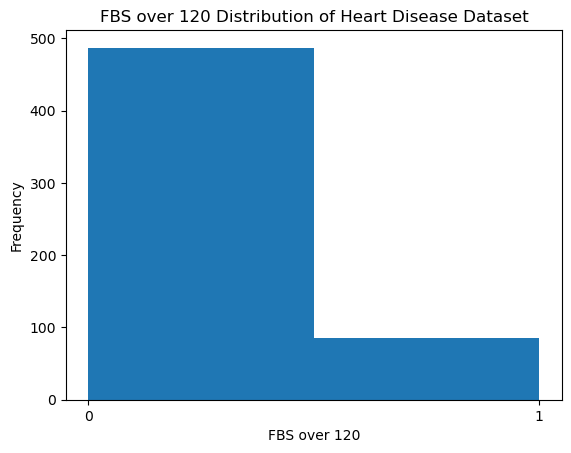

In [4]:
#FBS over 120 Histogram
plt.hist(heart_data_clean['FBS over 120'], bins=2)
plt.xlabel('FBS over 120')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.title('FBS over 120 Distribution of Heart Disease Dataset')
plt.savefig("./ExtraFig2.png")
plt.show()

#FBS over 120 Histogram 45-65

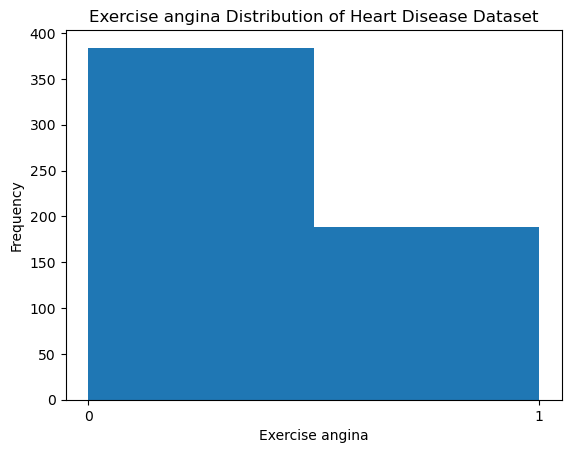

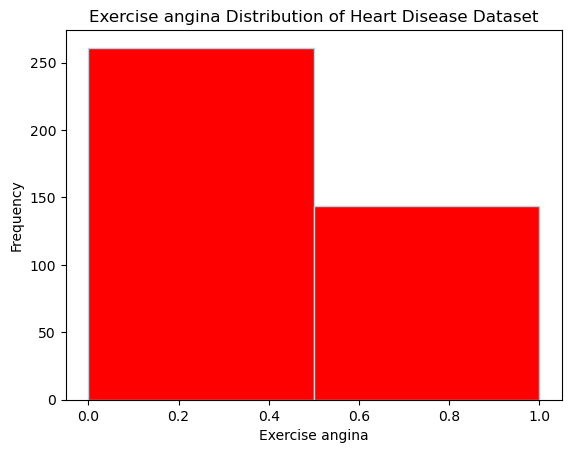

In [5]:
#Exercise angina Histogram
plt.hist(heart_data_clean['Exercise angina'], bins=2)
plt.xlabel('Exercise angina')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.title('Exercise angina Distribution of Heart Disease Dataset')
plt.savefig("./ExtraFig3.png")
plt.show()

#Exercise angina Histogram 45-65
plt.hist(Focal_group['Exercise angina'], color = "red", ec = 'lightblue', bins=2)
plt.xlabel('Exercise angina')
plt.ylabel('Frequency')
plt.title('Exercise angina Distribution of Heart Disease Dataset')
plt.savefig("./ExtraFig4.png")
plt.show()

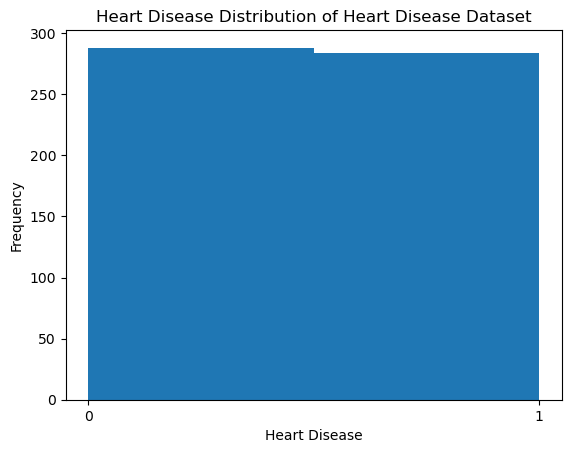

In [6]:
#Heart Disease Presence Histogram
plt.hist(heart_data_clean['Heart Disease'], bins=2)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.title('Heart Disease Distribution of Heart Disease Dataset')
plt.savefig("./ExtraFig5.png")
plt.show()

#Exercise angina Histogram 45-65

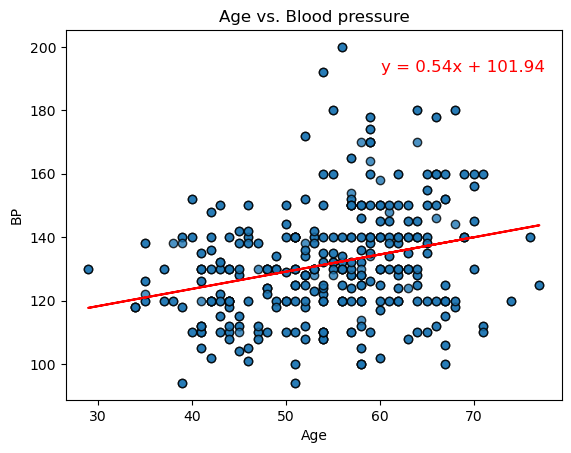

In [7]:
#Scatter plot for Age vs. Blood Pressure

x = heart_data_clean['Age']
y = heart_data_clean['BP']
# Perform linear regression to get the line equation
coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
# Create the regression line
regression_line = m * x + b
# Plot the scatter plot
plt.scatter(x, y, alpha=0.8, edgecolor='black', linewidth=1.0)
# Plot the regression line
plt.plot(x, regression_line, color='red')
# Set the plot title and axis labels
plt.title('Age vs. Blood pressure')
plt.xlabel('Age')
plt.ylabel('BP')
# Add the equation of the regression line as text to the graph
equation_text = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.8, 0.9, equation_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')
# Save the figure
plt.savefig("./ExtraFig6.png")
# Show the plot
plt.show() 

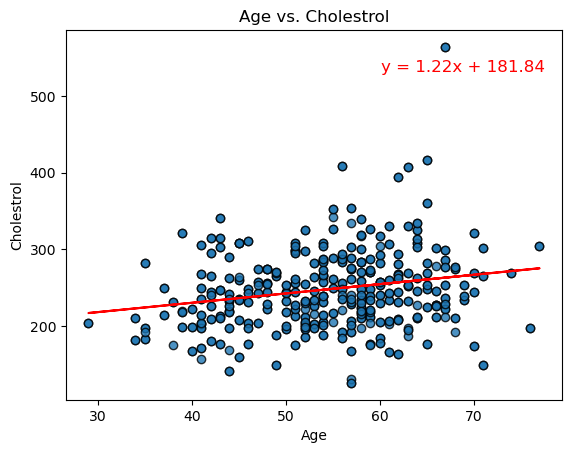

In [8]:
#Scatter plot for Age vs. Cholesterol

x = heart_data_clean['Age']
y = heart_data_clean['Cholesterol']
# Perform linear regression to get the line equation
coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
# Create the regression line
regression_line = m * x + b
# Plot the scatter plot
plt.scatter(x, y, alpha=0.8, edgecolor='black', linewidth=1.0)
# Plot the regression line
plt.plot(x, regression_line, color='red')
# Set the plot title and axis labels
plt.title('Age vs. Cholestrol')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
# Add the equation of the regression line as text to the graph
equation_text = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.8, 0.9, equation_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')
# Save the figure
plt.savefig("./ExtraFig7.png")
# Show the plot
plt.show() 

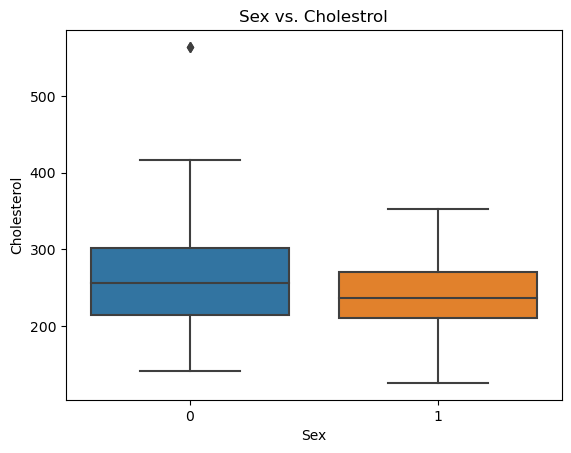

In [9]:
#box plot for Sex vs. Cholestrol

sns.boxplot(x='Sex', y='Cholesterol', data=heart_data_clean)
plt.title('Sex vs. Cholestrol')
plt.savefig("./ExtraFig8.png")
plt.show()

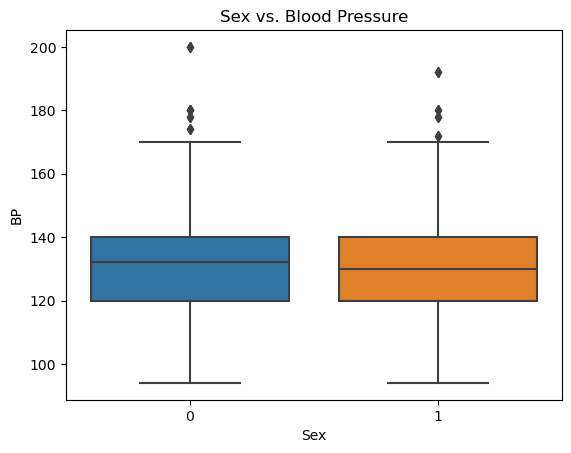

In [10]:
#box plot for sex vs. BP

sns.boxplot(x='Sex', y='BP', data=heart_data_clean)
plt.title('Sex vs. Blood Pressure')
plt.savefig("./ExtraFig9.png")
plt.show()

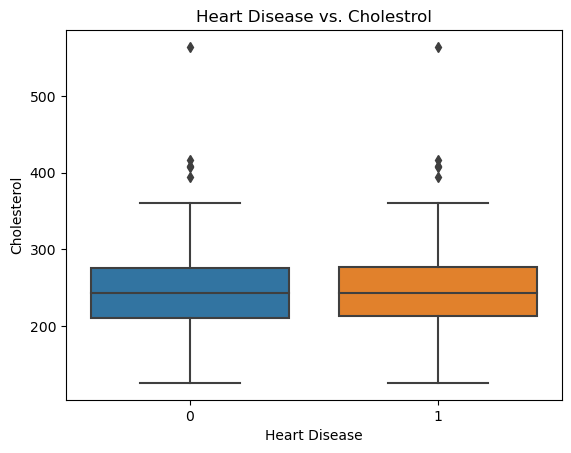

In [11]:
# Box plot for Heart Disease vs Cholestrol

sns.boxplot(x='Heart Disease', y='Cholesterol', data=heart_data_clean)
plt.title('Heart Disease vs. Cholestrol')
plt.savefig("./ExtraFig10.png")
plt.show()

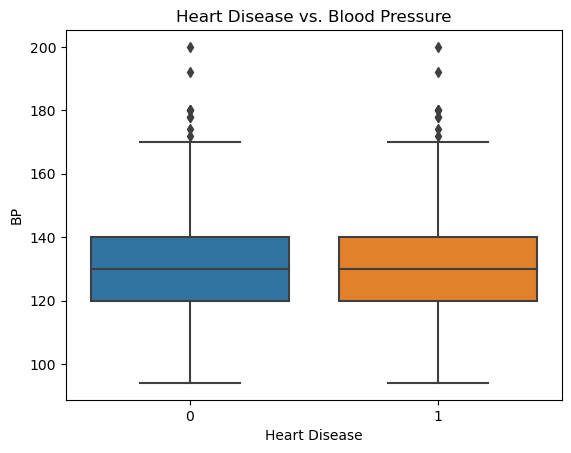

In [12]:
# Box plot Heart Disease vs Blood Pressure

sns.boxplot(x='Heart Disease', y='BP', data=heart_data_clean)
plt.title('Heart Disease vs. Blood Pressure')
plt.savefig("./ExtraFig11.png")
plt.show()

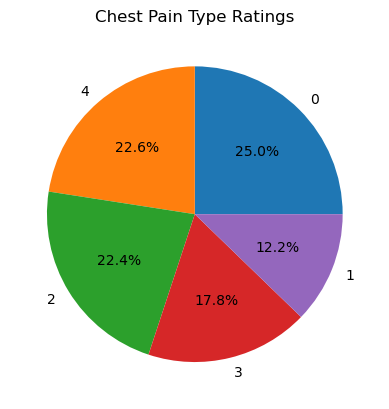

In [13]:
#Pie chart for chest pain

# Count the number of each type of chest pain rating
chest_pain_counts = heart_data_clean['Chest pain type'].value_counts()

# Create a pie chart
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%')
plt.title('Chest Pain Type Ratings')
plt.savefig("./ExtraFig12.png")
plt.show()

In [14]:
#Quartiles for Age 

quartiles_age = heart_data_clean['Age'].describe()[['25%', '50%', '75%']]
quartiles_age

#Quartiles for Age 45-65

quartiles_age = Focal_group['Age'].describe()[['25%', '50%', '75%']]
quartiles_age

25%    52.0
50%    56.0
75%    60.0
Name: Age, dtype: float64

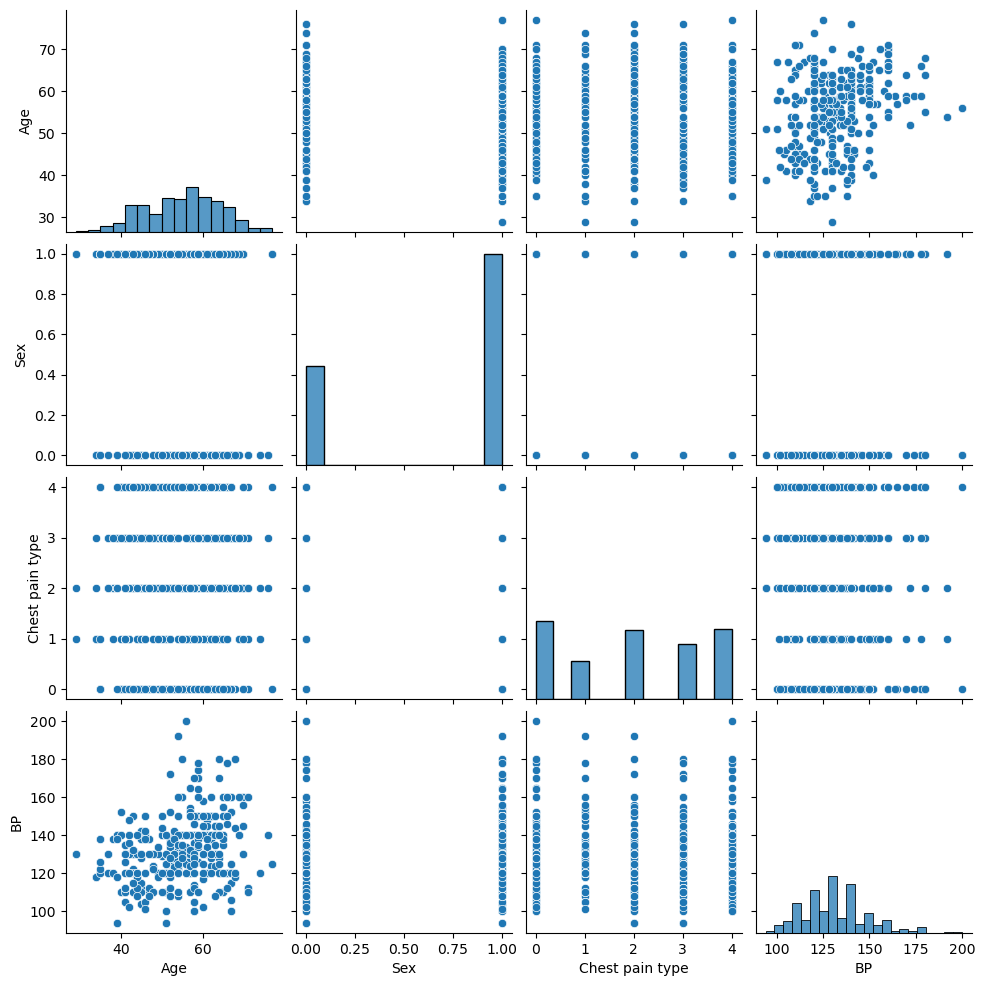

In [15]:
#Pair Plot

sns.pairplot(data=heart_data_clean.iloc[:,:4])

In [16]:
# ANOVA test that we are not using because we are looking only at datat either in the rage or out 
#rather than in the range, above the range, or below the range

# Create the age groups
age_less_than_45 = heart_data_clean[heart_data_clean['Age'] < 45]['Age']
age_45_to_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]['Age']
age_above_65 = heart_data_clean[heart_data_clean['Age'] > 65]['Age']
# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(age_less_than_45, age_45_to_65, age_above_65)
# Print the results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA Test Results:
F-statistic: 676.2385256993267
p-value: 4.317425291409004e-151
